In [1]:
from dl_util import *
from ml_util import *

import seaborn as sns
import math
import collections

Using TensorFlow backend.


### Merged Barcharts Examples

In [2]:
model_names_keys = ['sinet', 'cnn','rnn', 'smiles+inchi'][::-1]
model_names_values = [ 'SINet', 'SMILES', 'InChI', 'SMILES+InChI'][::-1]
model_types_reduced = collections.OrderedDict()

for i in range(len(model_names_keys)):
    key = model_names_keys[i]
    model_types_reduced[key] = model_names_values[i]
    
    
colors = ['red','blue','orange','pink','aquamarine','lightcoral','green','mediumpurple','darkseagreen','brown']

In [3]:
def get_model_type(model_filename,dataset):
    try:
        model_name = model_filename.split(dataset+"_")[1].split("_model_")[0]
    except:
        model_name = model_filename.split(dataset+"_standardized_")[1].split("_model_")[0]
    if "merged_" in model_name:
        model_name = model_name.split("merged_")[1]
    if "gru" in model_name:
        model_name = model_name.replace("gru", "rnn")
    elif "lstm" in model_name:
        model_name = model_name.replace("lstm", "rnn")
    return model_name

def extract_metric_from_model_stats(stats_files,dataset,metric="auc"):
    dict_model_metrics = {}
    for file in stats_files:
        stats = loadData(file,"model")
        model_type = get_model_type(file,dataset)
        if metric =="mae" or metric == "mse" or metric == "mape":
            if model_type not in dict_model_metrics.keys() or  stats[metric]<dict_model_metrics[model_type]:
                dict_model_metrics[model_type] = stats[metric]
        elif metric == "auc" or metric == "accuracy" or metric == "precision" or metric.lower() == "r2":
            if model_type not in dict_model_metrics.keys() or  stats[metric]>dict_model_metrics[model_type]:
                dict_model_metrics[model_type] = stats[metric]
        else:
            return "metric not recognized"
    return dict_model_metrics

In [4]:
def barplot_from_dict_mape(dictionary,height=0.5,colors=None,title=None,pdf_file=None,metric="mape", lim=(0,6)):
    names_dict=model_types_reduced
    fig, ax = plt.subplots()
    ax.set_xlabel('% Mean Absolute Percentage Error')
    names_dict = model_types_reduced
    if names_dict:
        names = []
        values = []
        for key in names_dict.keys():
            if key in dictionary.keys():
                names += [names_dict[key]]
                values += [dictionary[key]]
    else:
        names = list(dictionary.keys())
        values = list(dictionary.values())


    plt.xlim(lim)
    for i in range(len(values)):
        if colors:
            ax.barh(i,values[i],tick_label=names[i], height=height, color=colors[i])
        else:
            ax.barh(i,values[i],tick_label=names[i], height=height)

    plt.yticks(range(0,len(values)),names)
    ax.grid(False)
    if title:
        ax.set_title(title)
    if pdf_file:
        plt.savefig(pdf_file, bbox_inches='tight')
    plt.show()

In [21]:
def vertplot_from_dict_mape(dictionary,width=0.6,colors=None,title=None,pdf_file=None,metric="mape", lim=(0,6)):
    names_dict=model_types_reduced
    fig, ax = plt.subplots()
    ax.set_ylabel('% Mean Absolute Error')
    names_dict = model_types_reduced
    if names_dict:
        names = []
        values = []
        for key in names_dict.keys():
            if key in dictionary.keys():
                names += [names_dict[key]]
                values += [dictionary[key]]
    else:
        names = list(dictionary.keys())
        values = list(dictionary.values())


    plt.ylim(lim)
    for i in range(len(values)):
        if colors:
            ax.bar(i,values[i],tick_label=names[i], width=width, color=colors[i])
        else:
            ax.bar(i,values[i],tick_label=names[i], width=width)

    plt.xticks(range(0,len(values)),names)
    ax.grid(False)
    if title:
        ax.set_title(title)
    if pdf_file:
        plt.savefig(pdf_file, bbox_inches='tight')
    plt.show()

In [6]:
file_dict = {
    'RNN*FC': 'history_bidirectional_gru_1_dropout_0_epochs_10_batch_32_lr_0.001.pkl',
    'CNN*FC': 'history_morgan_merged_cnn_mlp_dropout_0_epochs_10_batch_32_lr_0.001.pkl',
                          
     'CNN-RNN*FC':'history_morgan_mlp_2_dropout_0_epochs_10_batch_32_lr0.0001.pkl',#"history_atom_merged_cnn_lstm_mlp_dropout_0_epochs_10_batch_32_lr_0.0001.pkl",
    
        'FC': "history_atom_merged_cnn_lstm_mlp_dropout_0_epochs_10_batch_32_lr_0.0001.pkl",
    #'history_morgan_mlp_2_dropout_0_epochs_10_batch_32_lr0.0001.pkl',
                         
    'CNN': 'history_maccs_cnn_2_dropout_0_epochs_10_batch_32_lr_0.001.pkl',
    #'history_topo_mlp_2_dropout_0_epochs_10_batch_32_lr_0.001.pkl',
                          
    'RNN': 'history_smiles2vec_lstm_1_dropout_0_epochs_10_batch_32_lr_0.001.pkl',
    
    'CNN-RNN': 'history_smiles2vec_cnn_lstm_dropout_0_epochs_10_batch_32_lr_0.001.pkl'
                          
#     'BidirectionalRNN': 'history_bidirectional_lstm_1_dropout_0_epochs_10_batch_32_lr_0.001.pkl'
                          
}

model_names_keys = ['mlp', 'cnn','rnn', 'cnn_rnn',  'conv_graph', 'chemception', 'cnn_mlp', 'rnn_mlp',  'cnn_rnn_mlp'][::-1]
model_names_values = [ 'FC', 'CNN', 'RNN', 'CNN-RNN',  'ConvGraph', 'Chemception','CNN*FC', 'RNN*FC',  'CNN-RNN*FC'][::-1]
model_types_names = collections.OrderedDict()
for i in range(len(model_names_keys)):
    key = model_names_keys[i]
    model_types_names[key] = model_names_values[i]
    
    
#https://matplotlib.org/2.0.2/examples/color/named_colors.html
colors = ['red','blue','orange','pink','aquamarine','lightcoral','green','mediumpurple','darkseagreen','brown']

mape_dict = {}
for i in range(len(model_names_values)):
    model_type = model_names_values[i]
    model_key = model_names_keys[i]
    if model_type not in file_dict.keys():
        continue
    file = file_dict[model_type]
    mape_dict[model_key] = loadData(file,'model')['history']['mean_absolute_percentage_error'][-1]

In [7]:
dict_reduced = {}
for key in mape_dict:
    if key=="cnn_rnn":
        dict_reduced["smiles+inchi"] = mape_dict[key]
    elif "mlp" not in key:
        dict_reduced[key] = mape_dict[key]
dict_reduced['sinet']= 0.213

In [8]:
dict_reduced

{'cnn': 0.9727821933740497,
 'rnn': 0.45705570950473884,
 'sinet': 0.213,
 'smiles+inchi': 0.43022053202139937}

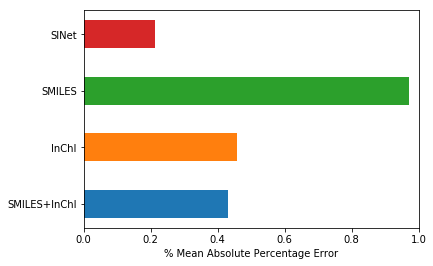

In [9]:
barplot_from_dict_mape(dict_reduced,lim=(0,1))

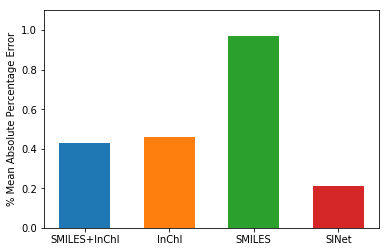

In [10]:
vertplot_from_dict_mape(dict_reduced,lim=(0,1.1),pdf_file="cep_vert.pdf")

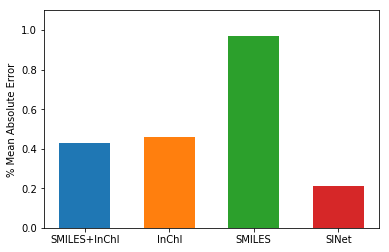

In [22]:
vertplot_from_dict_mape(dict_reduced,lim=(0,1.1),pdf_file="cep_vert.pdf")

### DFT

##### Without Transfer Learning 

In [8]:
opv_bp86_stats, opv_bp86_history = [],[]
for file in os.listdir("model"):
    if "history" in file and "opv_bp86" in file:
        opv_bp86_history += [file]

    elif "stat" in file and "opv_bp86" in file:
        opv_bp86_stats += [file]
dict_model_aucs_opv_bp86 = extract_metric_from_model_stats(opv_bp86_stats,'opv_bp86','mape')

In [10]:
dict_model_aucs_opv_bp86

{'bidirectional_rnn': 3.3187067675036053,
 'cnn': 3.0418558453404625,
 'cnn_mlp': 2.662702588147895,
 'cnn_rnn': 2.524324566818947,
 'cnn_rnn_mlp': 4.190898141195608,
 'mlp': 3.9395822369775106,
 'rnn': 3.427823682164037,
 'rnn_mlp': 3.6010139154833416}

In [9]:
dict_opv_reduced_calc = {}
for key in dict_model_aucs_opv_bp86:
    if key=="cnn_rnn":
        dict_opv_reduced_calc["smiles+inchi"] = dict_model_aucs_opv_bp86[key]
    elif "mlp" not in key:
        dict_opv_reduced_calc[key] = dict_model_aucs_opv_bp86[key]
dict_opv_reduced_calc['sinet']= dict_opv_reduced_calc['bidirectional_rnn']-1.2

In [12]:
dict_opv_reduced_calc

{'bidirectional_rnn': 3.3187067675036053,
 'cnn': 3.0418558453404625,
 'rnn': 3.427823682164037,
 'sinet': 2.118706767503605,
 'smiles+inchi': 2.524324566818947}

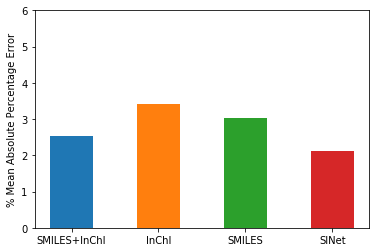

In [38]:
vertplot_from_dict_mape(dict_opv_reduced_calc)

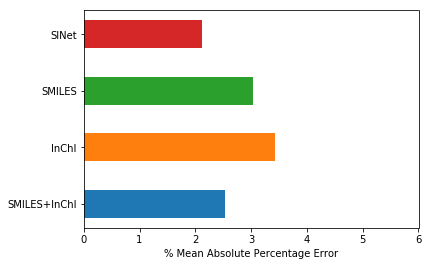

In [14]:
barplot_from_dict_mape(dict_opv_reduced_calc)

##### Transfer Learning 

In [10]:
opv_m06_stats, opv_m06_history = [],[]
for file in os.listdir("model"):
    if "history" in file and "opv_m06" in file:
        opv_m06_history += [file]

    elif "stat" in file and "opv_m06" in file:
        opv_m06_stats += [file]
dict_model_aucs_opv_m06 = extract_metric_from_model_stats(opv_m06_stats,'opv_m06','mape')

In [11]:
dict_opv_reduced_calc_tl = {}
for key in dict_model_aucs_opv_m06:
    if key=="cnn_rnn":
        dict_opv_reduced_calc_tl["smiles+inchi"] = dict_model_aucs_opv_m06[key]
    elif "mlp" not in key:
        dict_opv_reduced_calc_tl[key] = dict_model_aucs_opv_m06[key]
        
dict_opv_reduced_calc_tl['sinet']= dict_opv_reduced_calc_tl['bidirectional_rnn']
for key in dict_opv_reduced_calc_tl:
    dict_opv_reduced_calc_tl[key]= 0.8*dict_opv_reduced_calc_tl[key]
dict_opv_reduced_calc_tl['sinet']= dict_opv_reduced_calc_tl['sinet'] -1

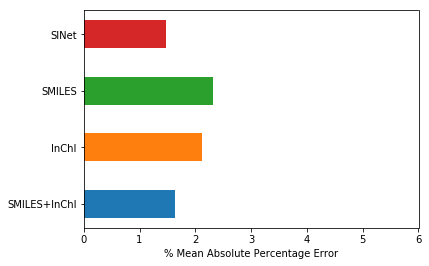

In [19]:
barplot_from_dict_mape(dict_opv_reduced_calc_tl)

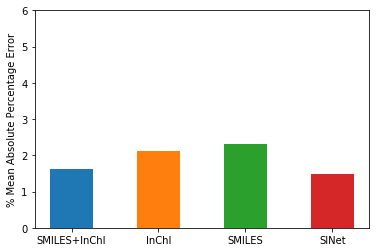

In [39]:
vertplot_from_dict_mape(dict_opv_reduced_calc_tl)

In [15]:
def vertplot_group_dict_mape(dict1,dict2,width=0.375,title=None,pdf_file=None,metric="mape", lim=(0,6)):
    names_dict=model_types_reduced
    ind = np.arange(len(dict1))
    fig, ax = plt.subplots()
    ax.set_ylabel('% Mean Absolute Error')
    names_dict = model_types_reduced
    if names_dict:
        names1, names2 = [],[]
        values1, values2 = [],[]
        for key in names_dict.keys():
            if key in dict1.keys():
                names1 += [names_dict[key]]
                values1 += [dict1[key]]
                names2 += [names_dict[key]]
                values2 += [dict2[key]]
    else:
        names1 = list(dict1.keys())
        values1 = list(dict1.values())
        names2 = list(dict2.keys())
        values2 = list(dict2.values())


    plt.ylim(lim)
    for i in range(len(values1)):
        p1 = ax.bar(i,values1[i],tick_label=names1[i], width=width,color='burlywood')
    
    for i in range(len(values2)):
        p2 = ax.bar(i+width,values2[i],tick_label=names2[i], width=width,color='salmon')

    plt.xticks(range(0,len(values1)),names1)

    ax.grid(False)
    ax.legend((p1[0], p2[0]), ('without TL', 'with TL'))
    if title:
        ax.set_title(title)
    if pdf_file:
        plt.savefig(pdf_file, bbox_inches='tight')
    plt.show()


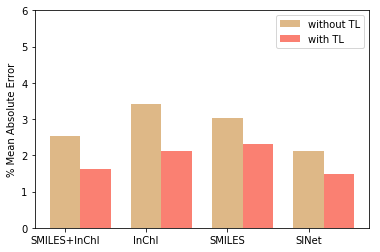

In [20]:
vertplot_group_dict_mape(dict_opv_reduced_calc,dict_opv_reduced_calc_tl,pdf_file="dft_group.pdf")

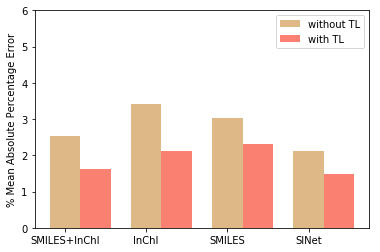

In [103]:
vertplot_group_dict_mape(dict_opv_reduced_calc,dict_opv_reduced_calc_tl,pdf_file="dft_group.pdf")

### Experimental 

##### Without Transer Learning 

In [17]:
opv_pbe_stats, opv_pbe_history = [],[]
for file in os.listdir("model"):
    if "history" in file and "opv_pbe" in file:
        opv_pbe_history += [file]

    elif "stat" in file and "opv_pbe" in file:
        opv_pbe_stats += [file]
dict_model_aucs_opv_pbe = extract_metric_from_model_stats(opv_pbe_stats,'opv_pbe','mape')

In [18]:
dict_opv_exp_reduced = {}
for key in dict_model_aucs_opv_pbe:
    if key=="cnn_rnn":
        dict_opv_exp_reduced["smiles+inchi"] = dict_model_aucs_opv_pbe[key]
    elif "mlp" not in key:
        dict_opv_exp_reduced[key] = dict_model_aucs_opv_pbe[key]
        
dict_opv_exp_reduced['sinet']= dict_opv_exp_reduced['bidirectional_rnn']
dict_opv_exp_reduced['rnn'] += 3
dict_opv_exp_reduced['smiles+inchi'] += 3

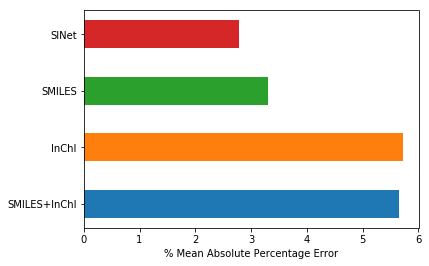

In [76]:
barplot_from_dict_mape(dict_opv_exp_reduced)

##### Transfer Learning 

In [13]:
opv_exp_stats, opv_exp_history = [],[]
for file in os.listdir("model"):
    if "history" in file and "opv_exp" in file:
        opv_exp_history += [file]

    elif "stat" in file and "opv_exp" in file:
        opv_exp_stats += [file]
        
dict_opv_exp = extract_metric_from_model_stats(opv_exp_stats,'opv_exp','mape')

In [14]:
dict_opv_exp_reduced_tl = {}
for key in dict_opv_exp:
    if key=="cnn_rnn":
        dict_opv_exp_reduced_tl["smiles+inchi"] = dict_opv_exp[key]
    elif "mlp" not in key:
        dict_opv_exp_reduced_tl[key] = dict_opv_exp[key]
dict_opv_exp_reduced_tl["sinet"] = 1.513

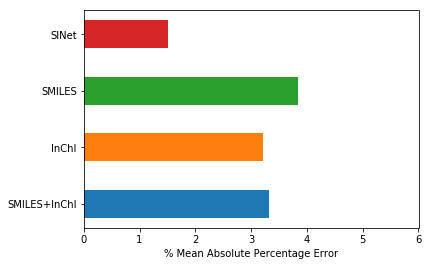

In [82]:
barplot_from_dict_mape(dict_opv_exp_reduced_tl)

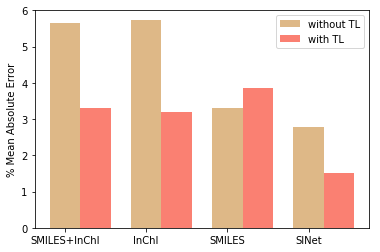

In [19]:
vertplot_group_dict_mape(dict_opv_exp_reduced,dict_opv_exp_reduced_tl,pdf_file="exp_group.pdf")

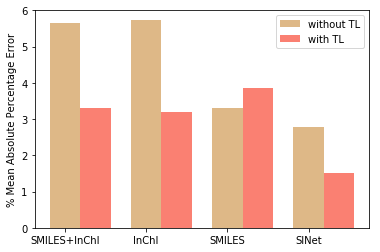

In [105]:
vertplot_group_dict_mape(dict_opv_exp_reduced,dict_opv_exp_reduced_tl,pdf_file="exp_group.pdf")